<h1>Scientific coding bootcamp notebook 3: Differential equations.</h1>
Physics is "the study of things which can be modelled by differential equations".  This is of course an exageration, but only a slight one.  DifferentialEquations.jl is one of the best (if not the best) packages for solving a wide class of differential equations.  We will only scratch the surface here. 

In [41]:
using Plots, DifferentialEquations

<h2>Basic ODE interface.</h2>
The way you interact with DifferentialEquations package to solve ODEs is as follows. 

* First you must write your ODE as a system of first order equations of the form $\frac{d}{dt}\vec x = f(\vec x)$.
* Then you define a Julia function to evaluate $f$.  The function must take three arguments.  The first is the current state of the differential equation solution $\vec x$.  The second argument is a vector of parameters.  The third argument is the current time.  The function does not need to actually depend on all these arguments, but they have to be there.  E.g. to solve the ODE $u' = - u$, you could define the function 
```julia
function f(x::Vector{Float64},p,t)
    return -x
end
```
* Define an initial condition vector, e.g. `x_init = [1.0, 0.5]`, and a time range, e.g. `tspan = (0.0, 1.0)`.
* Pass `f, x_init, tspan` to the function `ODEProblem`, e.g.
```julia
prob = ODEProblem(f,x_init,tspan)
```
* Solve the problem with the function `solve`, e.g.
```julia
sol = solve(prob; save_everystep = true )
```
* The object `sol` contains all the information you are likely to want.  There are different ways to extract that info.  E.g. if you want a plot of the solution, you can usually just call `plot(sol)`.  If you want the raw data, you can get it via `sol.u[j]` for the solution values at time step $j$ and `sol.t[j]` for the time value at time step $j$.  You can also call the solution as a function to get the solution value at any interpolated time, e.g. `sol(1.5)`. 

<h2>Damped harmonic oscillator.</h2>
As a warmup, let's solve the damped harmonic oscillator.  This shows all the basic elements of solving ODEs in Julia.  Recall that the equation of motion is 
$$
\ddot x = -\omega^2 x - \gamma \dot x.
$$
The first step is to rewrite this (single second order equation) as a system of first order equations.  We accomplish this by defining $y=\dot x$ and rewriting all $\dot x$'s as $y$'s and all $\ddot x$'s as $\dot y$'s.  Using this trick, try to write the above equation in the form 
$$
\frac{d}{dt} \begin{bmatrix}
           x \\
           y
         \end{bmatrix}
         = 
         \begin{bmatrix}
           ? \\
           ?
         \end{bmatrix}.
$$

Answer: 
$$
\frac{d}{dt} \begin{bmatrix}
           x \\
           y
         \end{bmatrix}
         = 
         \begin{bmatrix}
           y \\
           -\omega^2 x - \gamma y
         \end{bmatrix}.
$$

In [42]:
# Fill in the code below to solve the damped harmonic oscillator. 
x_init = [10, 0] 
const ω = 2.0
const γ = 0.5
tspan = (0,15)
function f(x::Vector{T},p,t) where T<:Number
    # Your code here.
    return [x[2], -ω^2 * x[1] - γ * x[2]]
end

prob = ODEProblem(f,x_init,tspan)
sol = solve(prob;save_everystep = true);

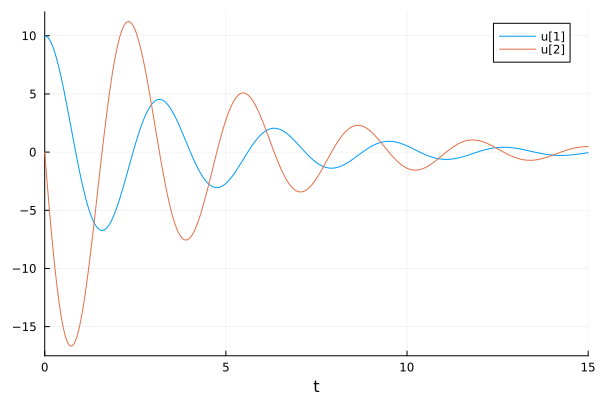

In [43]:
plot(sol)

Leaving ω fixed, try to find a value of γ which minimizes the average magnitude of $x$ over all initial conditions. 

In [ ]:
# Your code here. 

<h2>Double pendulum.</h2>
As a more complicated example, let's solve the double pendulum.  As a warm up, either write down or look up the Lagrangian for a double pendulum with gravitational constant $g$, lengths $l_1, l_2$, and respective masses $m_1,m_2$, with the second mass pivoting about the first one. 

Answer:

$
T = \frac{1}{2}m_1 \dot\theta_1^2 l_1^2 + \frac{1}{2} m_2 \left(\dot\theta_1^2 l_1^2 + \dot\theta_2^2 l_2^2 + 2\cos(\theta_1 - \theta_2) \dot\theta_1 \dot\theta_2 l_1 l_2\right)
$

$
V = -g\left(m_1\cos(\theta_1)l_1 + m_2(\cos(\theta_2) l_2+\cos(\theta_1)l_1)\right)
$

$
L = T - V
$

From the Lagrangian and the Euler-Lagrange equation, 
$$
0 = \frac{d}{dt} \frac{\partial L}{\partial \dot q} - \frac{\partial L}{\partial q},
$$
you can derive the equations of motion

$$
\frac{d}{dt} \begin{bmatrix}
           \theta_1 \\
           \dot\theta_1 \\
           \theta_2 \\
           \dot\theta_2
         \end{bmatrix}
         = 
         \begin{bmatrix}
           \dot\theta_1 \\
           \frac{c-bd}{a-b^2} \\
           \dot\theta_2 \\
           \frac{ad-bc}{a-b^2}
         \end{bmatrix}
$$
where

$
a = 1 + M
$

$
b = L \cos(\theta_2-\theta_1)
$

$
c = \sin(\theta_2-\theta_1) \dot\theta_2^2 L - G L (1+M) \sin(\theta_1)
$

$
d = -\sin(\theta_2 - \theta_1) \dot\theta_1^2 L - G L \sin(\theta_2)
$

$
L = l_1/l_2
$

$
M = m_1/m_2
$

$
G = g/l_2
$

Complete the code below to simulate the double pendulum with initial conditions $\theta_1=\theta_2=3\pi/4$.

In [44]:
const l1 = 2.0
const l2 = 3.2
const m1 = 3.0
const m2 = 0.8
const g = 9.8
const L = l1/l2
const M = m1/m2
const G = g/l2

tspan = (0,15)
x_init = [3pi/4, 0, 3pi/4, 0] 
function f(x::Vector{T},p,t) where T<:Number
    # Your code here.
    a = 1+M
    b = L*cos(x[3]-x[1])
    c = sin(x[3]-x[1])*x[4]^2*L - G*L*(1+M)*sin(x[1])
    d = -sin(x[3]-x[1])*x[2]^2*L - G*L*sin(x[3])
    denom = 1/(a-b^2)
    return [x[2], (c-b*d)*denom, x[4], (a*d-b*c)*denom]
end

prob = ODEProblem(f,x_init,tspan)
sol = solve(prob;save_everystep = true);

In [45]:
# Let's animate the solution!

function doublePendulumPlot(u)
    plot([0,l1*sin(u[1])],[0,-l1*cos(u[1])];
        linewidth=5,
        color=:red,
        aspect_ratio=1,
        size=(400,400),
        xlim=(-l1-l2,l1+l2),
        ylim=(-l1-l2,l1+l2))
    plot!([l1*sin(u[1]),l1*sin(u[1])+l2*sin(u[3])],[-l1*cos(u[1]),-l1*cos(u[1])-l2*cos(u[3])];
        linewidth=5,
        color=:blue,
        legend=false)
end

doublePendulumPlot (generic function with 1 method)

[ Info: Saved animation to C:\Users\anonc\Desktop\ScientificCodingBootcamp\doublePendulumAnim.gif


Plots.AnimatedGif("C:\\Users\\anonc\\Desktop\\ScientificCodingBootcamp\\doublePendulumAnim.gif")
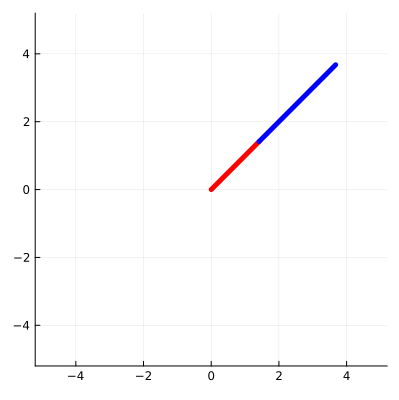

In [46]:
dt = 0.05
anim = @animate for t ∈ tspan[1]:dt:tspan[2]
    doublePendulumPlot(sol(t))
end
gif(anim,"doublePendulumAnim.gif",fps=30)